In [32]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
class backtesting: 
    #This class will be used to backtest
    def __init__(self,symbol,amount,api_key,fields,start=None,end=None):
        self.api_key = api_key
        self.base_url = 'https://api.tiingo.com'
        self.symbol = symbol
        self.start = start
        self.end = end
        self.fields = fields
        self.amount = amount
    def download_data(self):
        '''
        Creating the URL to download data from TIINGO
        '''
        url = f'{self.base_url}/tiingo/daily/{self.symbol}/prices?columns={self.fields}&token={self.api_key}'
        
        if self.start is not None:
            start_str = self.start.strftime('%Y-%m-%d')
            url += f'&startDate={start_str}'
        if self.end is not None:
            end_str = self.end.strftime('%Y-%m-%d')
            url += f'&endDate={end_str}'
        response = requests.get(url)
        if response.status_code == 200:
            data_json = response.json()
            data = pd.DataFrame(data_json)
            data['date'] = data['date'].apply(lambda fecha: datetime.datetime.fromisoformat(fecha[:-1]).strftime("%d/%m/%Y"))
            data.set_index('date', inplace=True)
            return data
        else:
            print('Error al realizar la solicitud:', response.status_code)

In [55]:
tiingo_key = 'fd3e279ff16fae94843cf9a66a5b1e363e93edf6'
start_date = datetime.datetime(2015,1,1) #YYYY,MM,DD
end_date = datetime.datetime(2023,5,28) #YYYY,MM,DD
symbol = 'NVDA'
fields = 'adjClose' 
#Fields available 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh','adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'
backtest = backtesting(symbol,1,tiingo_key,fields,start_date,end_date)

In [56]:
data = backtest.download_data()

In [57]:
data.rename(columns={'close':'NVDA'},inplace=True)

In [58]:
data

,adjClose
date,
02/01/2015,4.835163
05/01/2015,4.753496
06/01/2015,4.609377
07/01/2015,4.596167
08/01/2015,4.770309
09/01/2015,4.789525
12/01/2015,4.729476
13/01/2015,4.721069
14/01/2015,4.741486


In [59]:
symbol = 'AMD'
amd = backtesting(symbol,1,tiingo_key,fields,start_date,end_date)

In [60]:
data_amd = amd.download_data()

In [61]:
data_amd.rename(columns={'close':'AMD'},inplace=True)

In [62]:
nvda_ret = np.log(data/data.shift(1))
amd_ret = np.log(data_amd/data_amd.shift(1))

In [63]:
nvda_ret.dropna(inplace=True)
amd_ret.dropna(inplace=True)

In [64]:
nvda_ret['cumulative_ret'] = nvda_ret.cumsum().apply(np.exp)
amd_ret['cumulative_ret'] = amd_ret.cumsum().apply(np.exp)

In [65]:
ratio = nvda_ret['cumulative_ret'] / amd_ret['cumulative_ret']

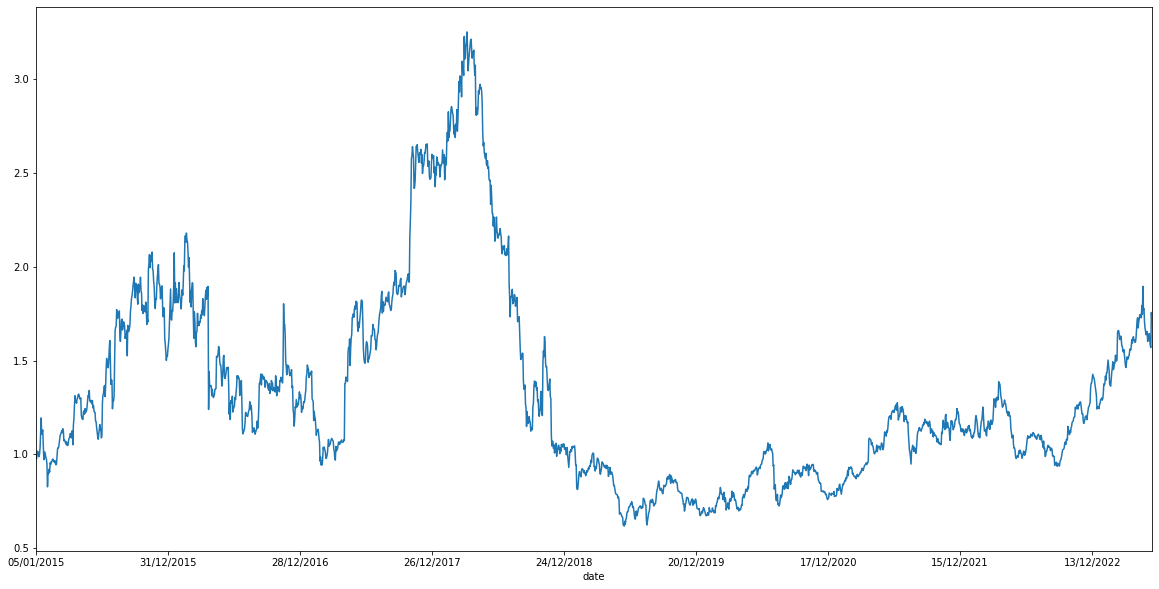

In [66]:
ratio.plot(figsize=(20,10))